# Network-Analysis-for-Information-Retrieval

## Data Loading 

In [27]:
import pandas as pd

FILE_PREFIX = "dblp-ref-"
NB_FILES = 4

corpus = []

for i in range(0, NB_FILES):
    file = './data/' + FILE_PREFIX + str(i) + ".json"
    data = pd.read_json(file, lines=True)
    corpus.append(data)

corpus = pd.concat(corpus, ignore_index=True)

In [28]:
corpus.shape

(3079007, 8)

----- Abstracts -----
Mean length of Abstracts 948.903579786324
Max length of Abstracts 11096.0
Min length of Abstracts 6.0


----- Authors -----
Number of authors 9476169
Number of unique authors 1766548
Mean number of authors per paper 5.3642303318281375
Number of paper per author : authors
Wei Wang            2518
Wei Zhang           1651
Lei Zhang           1611
Yang Liu            1572
Wei Li              1491
                    ... 
Youichi Kukimoto       1
R. M. Ma               1
Can A. Dogan           1
Todd F. McClain        1
Eirik Abildsnes        1
Name: count, Length: 1766547, dtype: int64


----- Temporal distribution -----


<Axes: >

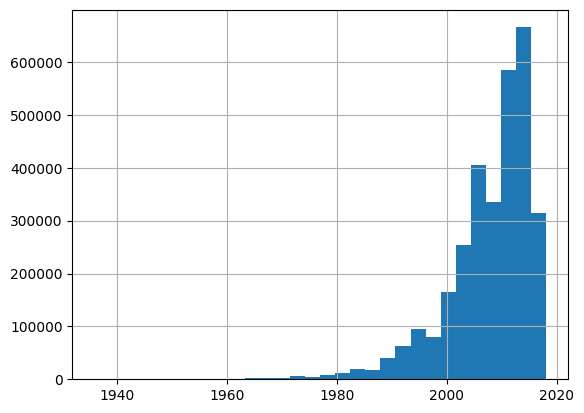

In [33]:
print("----- Abstracts -----")
print("Mean length of Abstracts", corpus['abstract'].str.len().mean())
print("Max length of Abstracts", corpus['abstract'].str.len().max())
print("Min length of Abstracts", corpus['abstract'].str.len().min())

print("\n")
print("----- Authors -----")
df_exploded = corpus.explode('authors')
print("Number of authors", len(df_exploded['authors']))
unique_authors = df_exploded['authors'].unique().tolist()
print("Number of unique authors", len(unique_authors))
print("Mean number of authors per paper", df_exploded['authors'].value_counts().mean())
print("Number of paper per author :", df_exploded['authors'].value_counts())

## temporal distribution
print("\n")
print("----- Temporal distribution -----")
corpus['year'].hist(bins=30)